In [17]:
from bs4 import BeautifulSoup
import json
import re

In [4]:
from plots import SNRVsLinewidthPlotterNN

  Using cached tikzplotly-0.1.7-py3-none-any.whl.metadata (6.0 kB)
Using cached tikzplotly-0.1.7-py3-none-any.whl (37 kB)


In [2]:
import os
try:
    import plotly
except ImportError as e:
    os.system("pip install plotly")
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


2025-01-08 21:24:47.469512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-08 21:24:48.265057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
# Load the HTML file
with open("snr_linewidth_linkdistNN_patience100.html", "r") as f:
    html = f.read()

In [30]:
# Parse the HTML
soup = BeautifulSoup(html, "html.parser")

In [31]:
# Extract the JSON from the <script> tag
script_tags = soup.find_all("script", text=re.compile(r"Plotly\.newPlot"))

/tmp/ipykernel_562/2174129108.py:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all("script", text=re.compile(r"Plotly\.newPlot"))


In [33]:
for tag in script_tags:
    # Extract the text within the <script> tag
    script_text = tag.string

    # Debug: Print the script content to verify the presence of both x and y
    print("Raw Script Content:")
    print(script_text[:500])  # Only print first 500 characters for brevity

    # Use a regex to extract the JSON-like data inside Plotly.newPlot
    match = re.search(r"Plotly\.newPlot\(\s*\"[^\"]+\",\s*(\[[^\]]+\])", script_text)
    if match:
        raw_plotly_json = match.group(1)

        # Debug: Print the raw extracted JSON-like structure
        print("Raw JSON-like Data:")
        print(raw_plotly_json)

        # Clean the extracted data to make it valid JSON
        # Remove trailing commas inside JSON arrays and objects
        sanitized_json = re.sub(r",\s*(})", r"\1", raw_plotly_json)  # Remove trailing comma before }
        sanitized_json = re.sub(r",\s*(])", r"\1", sanitized_json)  # Remove trailing comma before ]
        
        # Debug: Print the sanitized JSON to check if it's correct
        print("Sanitized JSON:")
        print(sanitized_json)

        try:
            # Parse the sanitized JSON
            plot_data = json.loads(sanitized_json)

            # Print the extracted plot data
            print("Extracted Plot Data:")
            print(json.dumps(plot_data, indent=4))

            # Debug: Print the x and y values for each plot trace
            for trace in plot_data:
                print("Trace Name:", trace.get("name"))
                print("x values:", trace.get("x"))
                print("y values:", trace.get("y"))

        except json.JSONDecodeError as e:
            print("Error decoding JSON:", e)
            print("Sanitized JSON:", sanitized_json)

Raw Script Content:
/**
* plotly.js v2.35.2
* Copyright 2012-2024, Plotly, Inc.
* All rights reserved.
* Licensed under the MIT license
*/
/*! For license information please see plotly.min.js.LICENSE.txt */
!function(t,e){"object"==typeof exports&&"object"==typeof module?module.exports=e():"function"==typeof define&&define.amd?define([],e):"object"==typeof exports?exports.Plotly=e():t.Plotly=e()}(self,(function(){return function(){var t={6713:function(t,e,r){"use strict";var n=r(34809),i={"X,X div":'direction:ltr;f
Raw Script Content:
                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("05445f3b-80ec-4070-bd7b-1e80ca577c09")) {                    Plotly.newPlot(                        "05445f3b-80ec-4070-bd7b-1e80ca577c09",                        [{"mode":"lines","name":"With NN, Distance 1000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[13.248315811157227,13.3152

In [38]:
plot_json = [{"mode":"lines","name":"With NN, Distance 1000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[23.515104293823242,32.15550994873047,40.98069381713867,36.60968780517578,37.10267639160156,35.494441986083984,32.585758209228516],"type":"scatter"},{"line":{"dash":"dash"},"mode":"lines","name":"Without NN, Distance 1000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[28.18678855895996,26.320026397705078,24.933746337890625,23.934375762939453,23.06918716430664,21.47696304321289,20.497604370117188],"type":"scatter"},{"mode":"lines","name":"With NN, Distance 2000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[23.34654426574707,31.477224349975586,33.08982849121094,36.95020294189453,32.19322967529297,33.35617446899414,29.785179138183594],"type":"scatter"},{"line":{"dash":"dash"},"mode":"lines","name":"Without NN, Distance 2000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[27.01873207092285,24.6907901763916,23.331695556640625,22.17685317993164,21.246952056884766,19.719886779785156,18.387784957885742],"type":"scatter"},{"mode":"lines","name":"With NN, Distance 4000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[23.92254638671875,33.88534164428711,31.08713722229004,30.583505630493164,30.647464752197266,26.784255981445312,21.510114669799805],"type":"scatter"},{"line":{"dash":"dash"},"mode":"lines","name":"Without NN, Distance 4000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[25.239351272583008,22.23198699951172,20.82746124267578,19.7088623046875,18.620849609375,17.4160099029541,15.87306022644043],"type":"scatter"},{"mode":"lines","name":"With NN, Distance 5000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[25.47623634338379,37.161800384521484,31.577938079833984,28.09367561340332,28.541017532348633,22.394163131713867,19.104238510131836],"type":"scatter"},{"line":{"dash":"dash"},"mode":"lines","name":"Without NN, Distance 5000.0 km","x":[100000.0,200000.0,300000.0,400000.0,500000.0,750000.0,1000000.0],"y":[24.296585083007812,21.74956512451172,20.133153915405273,18.62775421142578,17.97994041442871,16.081676483154297,14.590392112731934],"type":"scatter"}]

In [3]:
def plot(results):
    fig = go.Figure()

    for length in self.link_distances:
        snr_with_nn = []
        snr_without_nn = []

        for lw in self.linewidths:
            snr_with_nn.append(results[lw][length]["snr"][0]["nn_snr"])
            snr_without_nn.append(results[lw][length]["snr"][0]["original_snr"])

        fig.add_trace(go.Scatter(x=self.linewidths, y=snr_with_nn, mode='lines',
                                 name=f'With NN, Distance {length} km'))
        fig.add_trace(go.Scatter(x=self.linewidths, y=snr_without_nn, mode='lines',
                                 name=f'Without NN, Distance {length} km', line=dict(dash='dash')))

    fig.update_layout(
        xaxis_title='Linewidth (Hz)',
        yaxis_title='SNR (dB)',
        title='SNR vs. Linewidth for Different Link Distances',
        legend_title='Link Distance',
    )

    tikzplotly.save("snr_linewidth_linkdistNN.tex", fig)
    # fig.write_html("snr_linewidth_linkdistNN.html")
    fig.show()

In [ ]:
test_results[lw][length]["snr"].append({"original_snr": original_snr.numpy(), "nn_snr": nn_snr.numpy()})

In [ ]:
plotter = SNRVsLinewidthPlotterNN(pipeline, linewidths, link_distances)
plotter.plot(test_results)

In [36]:
import plotly.express as px
import tikzplotly

df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
tikzplotly.save("example.tex", fig)

In [40]:
fig = go.Figure()

for length in self.link_distances:
    fig.add_trace(go.Scatter(x=self.linewidths, y=results['with_tr'][length], mode='lines',
                             name=f'With TR, Distance {length} km'))
    fig.add_trace(go.Scatter(x=self.linewidths, y=results['without_tr'][length], mode='lines',
                             name=f'Without TR, Distance {length} km', line=dict(dash='dash')))

fig.update_layout(xaxis_title='Linewidth (Hz)',
                  yaxis_title='SNR (dB)',
                  title='SNR vs. Linewidth for Different Link Distances',
                  legend_title='Link Distance')

NameError: name 'go' is not defined

In [47]:
def plotly_to_tikz(plot_data):
    tikz_code = "\\begin{tikzpicture}\n"
    
    for trace in plot_data:
        name = trace.get('name', 'Unnamed Trace')
        x_values = trace.get('x', [])
        y_values = trace.get('y', [])
        line_style = ''  # Default line style

        if 'line' in trace:
            # Check if line style (e.g., dash) is present
            if 'dash' in trace['line']:
                line_style = '[dashed]'

        # Prepare coordinates in TikZ format
        coordinates = ' '.join([f"({x},{y})" for x, y in zip(x_values, y_values)])

        # Create TikZ plot command
        tikz_code += f"\\addplot {line_style} coordinates {{ {coordinates} }};\n"
        tikz_code += f"\\addlegendentry{{ {name} }}\n"
    
    tikz_code += "\\end{tikzpicture}\n"
    return tikz_code

# Convert the Plotly data to TikZ format
tikz_output = plotly_to_tikz(plot_json)

In [26]:
tikz_output

NameError: name 'tikz_output' is not defined

In [ ]:
https://hub.inue.science/user/raishalini/files/snr_linewidth_linkdistNN.html?_xsrf=MnwxOjB8MTA6MTczNDM0MjU1MHw1Ol94c3JmfDEzMjpNRGRoWVdNd01qSmpaRE5sTkdaaU0ySXdOekUxTVdZM1pUYzBOV1JrWVRVNllUZzJZV0ZsTlRneU9XSmpPV1l3Tm1aall6ZG1NVGxtTURnd09UVm1NR1U1WkRJM1l6UmpOamt3TmpVNFlqQm1PV1l4WVRsbU5UWXhNakE1TlRBNVpRPT18YTczOTkxYTBiOGUxYzM2NzIxZmM3MDk2ZWE0NmVjM2I2YjcyYzNkMzdkZjdiMzFmNjZkYzlmY2MxZTE5OGE5Yg

In [92]:
import json

# File path to the JSON file
file_path = "test_results_mseloss_snr_wogn.json"

# Read and load JSON data
with open(file_path, "r") as file:
    data = json.load(file)

# Print the loaded data
print("Loaded JSON data:")
print(data)

Loaded JSON data:
{'100000.0': {'1000.0': {'mse': [], 'snr': [{'original_snr': 13.956143379211426, 'nn_snr': 13.520953178405762}], 'evm': [], 'mse_x': [{'original_mse_x': 0.04019240289926529, 'nn_mse_x': 0.04442865028977394}]}, '2000.0': {'mse': [], 'snr': [{'original_snr': 13.9030179977417, 'nn_snr': 13.571863174438477}], 'evm': [], 'mse_x': [{'original_mse_x': 0.04068487137556076, 'nn_mse_x': 0.04390849173069}]}, '4000.0': {'mse': [], 'snr': [{'original_snr': 13.816479682922363, 'nn_snr': 13.299524307250977}], 'evm': [], 'mse_x': [{'original_mse_x': 0.04150509461760521, 'nn_mse_x': 0.04675164818763733}]}, '5000.0': {'mse': [], 'snr': [{'original_snr': 13.73161506652832, 'nn_snr': 13.40771770477295}], 'evm': [], 'mse_x': [{'original_mse_x': 0.0423504002392292, 'nn_mse_x': 0.04562967270612717}]}}, '200000.0': {'1000.0': {'mse': [], 'snr': [{'original_snr': 13.862244606018066, 'nn_snr': 13.33842945098877}], 'evm': [], 'mse_x': [{'original_mse_x': 0.041109975427389145, 'nn_mse_x': 0.0463

In [32]:
for i,j in data.items():
    for k,l in j.items():
        if k == '1000.0':
            print(i,k,l)

100000.0 1000.0 {'mse': [], 'snr': [{'original_snr': 13.967032432556152, 'nn_snr': -5.984964847564697}], 'evm': [], 'mse_x': [{'original_mse_x': 0.055297981947660446, 'nn_mse_x': -12.775007247924805}]}
200000.0 1000.0 {'mse': [], 'snr': [{'original_snr': 13.871624946594238, 'nn_snr': -6.002740859985352}], 'evm': [], 'mse_x': [{'original_mse_x': 0.05561605840921402, 'nn_mse_x': -12.83394718170166}]}
300000.0 1000.0 {'mse': [], 'snr': [{'original_snr': 13.785279273986816, 'nn_snr': -6.0016560554504395}], 'evm': [], 'mse_x': [{'original_mse_x': 0.0559067577123642, 'nn_mse_x': -12.836738586425781}]}
400000.0 1000.0 {'mse': [], 'snr': [{'original_snr': 13.685199737548828, 'nn_snr': -6.0020432472229}], 'evm': [], 'mse_x': [{'original_mse_x': 0.0562160462141037, 'nn_mse_x': -12.829652786254883}]}
500000.0 1000.0 {'mse': [], 'snr': [{'original_snr': 13.597432136535645, 'nn_snr': -5.999393939971924}], 'evm': [], 'mse_x': [{'original_mse_x': 0.056487664580345154, 'nn_mse_x': -12.82852840423584}]

In [37]:
data_org = {'100000.0': {'1000.0': {'mse': [{'original_mse': 0.04024948552250862, 'nn_mse': 0.03134312108159065}], 'snr': [{'original_snr': 13.949653625488281, 'nn_snr': 15.035836219787598}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.04066659137606621, 'nn_mse': 0.018770508468151093}], 'snr': [{'original_snr': 13.90817642211914, 'nn_snr': 17.265796661376953}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.041696492582559586, 'nn_mse': 0.017784878611564636}], 'snr': [{'original_snr': 13.796957969665527, 'nn_snr': 17.4974422454834}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.042467717081308365, 'nn_mse': 0.017971668392419815}], 'snr': [{'original_snr': 13.717391967773438, 'nn_snr': 17.45209503173828}], 'evm': [], 'mse_x': []}}, '200000.0': {'1000.0': {'mse': [{'original_mse': 0.04098331555724144, 'nn_mse': 0.01592455618083477}], 'snr': [{'original_snr': 13.871071815490723, 'nn_snr': 17.976469039916992}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.04191959649324417, 'nn_mse': 0.016165638342499733}], 'snr': [{'original_snr': 13.770294189453125, 'nn_snr': 17.90853500366211}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.044385362416505814, 'nn_mse': 0.01858220063149929}], 'snr': [{'original_snr': 13.527846336364746, 'nn_snr': 17.30927276611328}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.04530418664216995, 'nn_mse': 0.019777432084083557}], 'snr': [{'original_snr': 13.437174797058105, 'nn_snr': 17.03685760498047}], 'evm': [], 'mse_x': []}}, '300000.0': {'1000.0': {'mse': [{'original_mse': 0.041788727045059204, 'nn_mse': 0.01582397148013115}], 'snr': [{'original_snr': 13.785594940185547, 'nn_snr': 18.003032684326172}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.043491430580616, 'nn_mse': 0.01964285969734192}], 'snr': [{'original_snr': 13.616817474365234, 'nn_snr': 17.06880760192871}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.0467790812253952, 'nn_mse': 0.020488932728767395}], 'snr': [{'original_snr': 13.300372123718262, 'nn_snr': 16.885696411132812}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.048544637858867645, 'nn_mse': 0.022622155025601387}], 'snr': [{'original_snr': 13.137242317199707, 'nn_snr': 16.453317642211914}], 'evm': [], 'mse_x': []}}, '400000.0': {'1000.0': {'mse': [{'original_mse': 0.04282202944159508, 'nn_mse': 0.016188479959964752}], 'snr': [{'original_snr': 13.681855201721191, 'nn_snr': 17.906465530395508}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.044472333043813705, 'nn_mse': 0.017956426367163658}], 'snr': [{'original_snr': 13.521119117736816, 'nn_snr': 17.45981788635254}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.04900788143277168, 'nn_mse': 0.02309637889266014}], 'snr': [{'original_snr': 13.096492767333984, 'nn_snr': 16.363712310791016}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.052440520375967026, 'nn_mse': 0.02672368660569191}], 'snr': [{'original_snr': 12.803266525268555, 'nn_snr': 15.730973243713379}], 'evm': [], 'mse_x': []}}, '500000.0': {'1000.0': {'mse': [{'original_mse': 0.043755605816841125, 'nn_mse': 0.01742788776755333}], 'snr': [{'original_snr': 13.592864990234375, 'nn_snr': 17.590755462646484}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.04581286758184433, 'nn_mse': 0.019019564613699913}], 'snr': [{'original_snr': 13.393702507019043, 'nn_snr': 17.211570739746094}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.05135503038764, 'nn_mse': 0.02448819763958454}], 'snr': [{'original_snr': 12.89537525177002, 'nn_snr': 16.111637115478516}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.05428534001111984, 'nn_mse': 0.028887640684843063}], 'snr': [{'original_snr': 12.654611587524414, 'nn_snr': 15.394317626953125}], 'evm': [], 'mse_x': []}}, '750000.0': {'1000.0': {'mse': [{'original_mse': 0.04559110477566719, 'nn_mse': 0.020152373239398003}], 'snr': [{'original_snr': 13.409217834472656, 'nn_snr': 16.954757690429688}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.049291908740997314, 'nn_mse': 0.02148602530360222}], 'snr': [{'original_snr': 13.073949813842773, 'nn_snr': 16.680143356323242}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.05881041660904884, 'nn_mse': 0.028610343113541603}], 'snr': [{'original_snr': 12.311381340026855, 'nn_snr': 15.440692901611328}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.06416648626327515, 'nn_mse': 0.035897742956876755}], 'snr': [{'original_snr': 11.926660537719727, 'nn_snr': 14.449071884155273}], 'evm': [], 'mse_x': []}}, '1000000.0': {'1000.0': {'mse': [{'original_mse': 0.048021942377090454, 'nn_mse': 0.021252566948533058}], 'snr': [{'original_snr': 13.18494987487793, 'nn_snr': 16.72523307800293}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.05318455025553703, 'nn_mse': 0.024151302874088287}], 'snr': [{'original_snr': 12.743363380432129, 'nn_snr': 16.17181396484375}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.0666188970208168, 'nn_mse': 0.03532666712999344}], 'snr': [{'original_snr': 11.763470649719238, 'nn_snr': 14.518418312072754}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.07296168804168701, 'nn_mse': 0.04144876450300217}], 'snr': [{'original_snr': 11.367842674255371, 'nn_snr': 13.823674201965332}], 'evm': [], 'mse_x': []}}}

In [39]:
def overwrite_json(file_path, new_data):
    with open(file_path, "w") as file:
        json.dump(new_data, file, indent=4)
        print("json created/updated")
file_path = "test_results_mseloss_snr_original.json"
overwrite_json(file_path, data_org)

json created/updated


In [40]:
file_path = "test_results_mseloss_snr_original.json"

# Read and load JSON data
with open(file_path, "r") as file:
    data2 = json.load(file)

# Print the loaded data
print("Loaded JSON data:")
print(data2)

Loaded JSON data:
{'100000.0': {'1000.0': {'mse': [{'original_mse': 0.04024948552250862, 'nn_mse': 0.03134312108159065}], 'snr': [{'original_snr': 13.949653625488281, 'nn_snr': 15.035836219787598}], 'evm': [], 'mse_x': []}, '2000.0': {'mse': [{'original_mse': 0.04066659137606621, 'nn_mse': 0.018770508468151093}], 'snr': [{'original_snr': 13.90817642211914, 'nn_snr': 17.265796661376953}], 'evm': [], 'mse_x': []}, '4000.0': {'mse': [{'original_mse': 0.041696492582559586, 'nn_mse': 0.017784878611564636}], 'snr': [{'original_snr': 13.796957969665527, 'nn_snr': 17.4974422454834}], 'evm': [], 'mse_x': []}, '5000.0': {'mse': [{'original_mse': 0.042467717081308365, 'nn_mse': 0.017971668392419815}], 'snr': [{'original_snr': 13.717391967773438, 'nn_snr': 17.45209503173828}], 'evm': [], 'mse_x': []}}, '200000.0': {'1000.0': {'mse': [{'original_mse': 0.04098331555724144, 'nn_mse': 0.01592455618083477}], 'snr': [{'original_snr': 13.871071815490723, 'nn_snr': 17.976469039916992}], 'evm': [], 'mse_x'

In [33]:
def extract_data(htmlfile):
    html_doc=htmlfile.read()
    soup = BeautifulSoup(html_doc,'html.parser')
    arr=soup.find_all('script')
    s=str(arr[2])
    return s[s.find("[{"):s.find("}]")+2]

In [46]:
import os
import re
from bs4 import BeautifulSoup
path = "linechart/"
dir_list = os.listdir(path) 
data=[]
for file in dir_list:
    if(re.search(".html$",file)):
        htmlfile=open(file,'r')
        data.append(extract_data(htmlfile))

In [59]:
parsed_data = json.loads(data[0])
dictionaries = [item for item in parsed_data if isinstance(item, dict)]
print(dictionaries[0])

{'mode': 'lines', 'name': 'With NN, Distance 1000.0 km', 'x': [100000.0, 200000.0, 300000.0, 400000.0, 500000.0, 750000.0, 1000000.0], 'y': [14.758465766906738, 17.92780876159668, 17.992795944213867, 17.865318298339844, 17.503589630126953, 17.167327880859375, 16.81277847290039], 'type': 'scatter'}


In [63]:
parsed_data[6]

{'mode': 'lines',
 'name': 'With NN, Distance 5000.0 km',
 'x': [100000.0, 200000.0, 300000.0, 400000.0, 500000.0, 750000.0, 1000000.0],
 'y': [17.411344528198242,
  17.040056228637695,
  16.455219268798828,
  15.776386260986328,
  15.411513328552246,
  14.493789672851562,
  13.774768829345703],
 'type': 'scatter'}

In [69]:
air_dict = {100000.0: {1000.0: {'air': [0.18517187237739563, 0.8589114546775818, 1.1960901021957397, 1.509397268295288, 1.7783864736557007, 2.02894926071167, 2.2881386280059814, 2.50185489654541, 2.6462044715881348, 2.7267887592315674, 2.7887532711029053, 2.8165528774261475, 2.8428590297698975, 2.900604724884033, 2.934251070022583, 3.007791042327881, 3.0411102771759033, 3.0690720081329346, 3.097545862197876, 3.117917060852051, 3.1020476818084717, 3.1729440689086914, 3.2016079425811768, 3.2034947872161865, 3.2283270359039307, 3.255963087081909, 3.260671377182007, 3.266507863998413, 3.2959866523742676, 3.2901530265808105, 3.313091993331909, 3.309302806854248, 3.3314948081970215, 3.3455944061279297, 3.348114490509033, 3.369917392730713, 3.36844801902771, 3.3861849308013916, 3.3948450088500977, 3.3916871547698975, 3.418044328689575, 3.411123752593994, 3.4451940059661865, 3.4139277935028076, 3.434892416000366, 3.459193706512451, 3.4453277587890625, 3.455517292022705, 3.4433131217956543, 3.443033456802368, 3.481145143508911, 3.4762446880340576, 3.4887375831604004, 3.479933500289917, 3.508228063583374, 3.489482879638672, 3.4939451217651367, 3.507878065109253, 3.4946141242980957, 3.4971702098846436, 3.5200843811035156, 3.5082762241363525, 3.51263689994812, 3.51371693611145, 3.520475149154663, 3.513643741607666, 3.5403358936309814, 3.516467332839966, 3.5341830253601074, 3.537518262863159, 3.5334632396698, 3.540252208709717, 3.5435683727264404, 3.5580668449401855, 3.5533604621887207, 3.5445234775543213, 3.533938407897949, 3.5528998374938965, 3.552123785018921, 3.563157081604004, 3.546447277069092, 3.5666112899780273, 3.5509490966796875, 3.5661511421203613, 3.552035093307495, 3.5565247535705566, 3.5624818801879883, 3.5427322387695312, 3.5628902912139893, 3.5612378120422363, 3.560234785079956, 3.584479570388794, 3.561680793762207, 3.5603692531585693, 3.5687687397003174, 3.5763423442840576, 3.5740270614624023, 3.569732189178467, 3.5687637329101562, 3.5508363246917725, 3.5600218772888184, 3.5879251956939697, 3.5661301612854004, 3.5659875869750977, 3.5744478702545166, 3.5746748447418213, 3.570617437362671, 3.5954766273498535, 3.592794179916382, 3.588684558868408, 3.592475652694702, 3.596951484680176, 3.5999104976654053, 3.5749404430389404, 3.605823278427124, 3.610771894454956, 3.585897445678711, 3.5754411220550537, 3.5923891067504883, 3.588595390319824, 3.5903356075286865, 3.5810251235961914, 3.584437608718872, 3.5946004390716553, 3.610698938369751, 3.5833899974823]}}, 200000.0: {1000.0: {'air': [3.595791816711426, 3.588916778564453, 3.5838866233825684, 3.579690933227539, 3.5872104167938232, 3.600954055786133, 3.5980749130249023, 3.610668182373047, 3.6167972087860107, 3.59966778755188, 3.6108787059783936, 3.5937817096710205, 3.5890016555786133, 3.6130692958831787, 3.597902536392212, 3.589484930038452, 3.586030960083008, 3.602491617202759, 3.6068742275238037]}}}

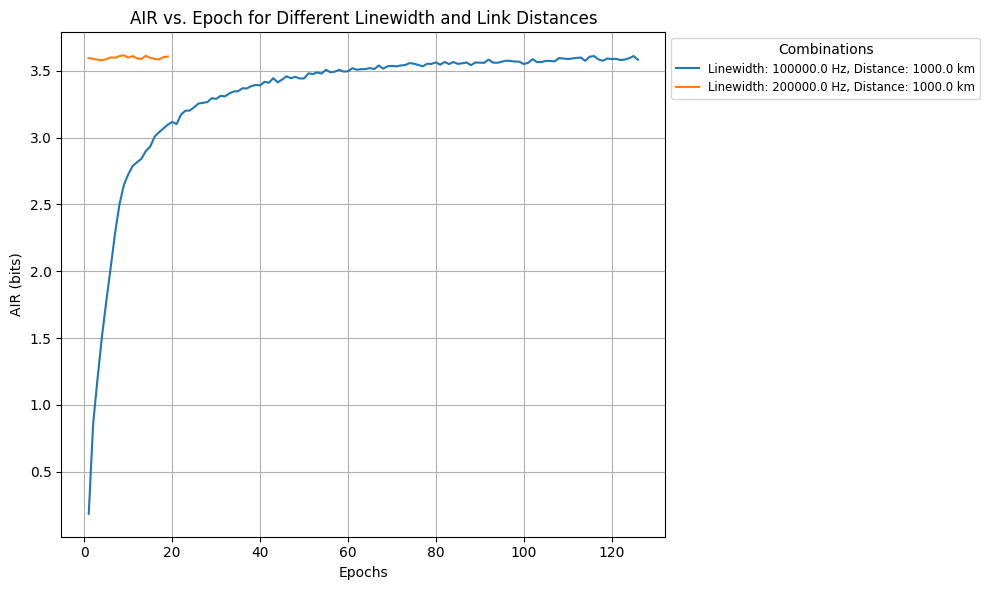

In [72]:
import matplotlib.pyplot as plt

def plot_air_vs_epoch(air_dict):
    """
    Plots AIR vs. Epoch for all combinations of linewidth and link distance.
    air_dict: Nested dictionary containing AIR values for each linewidth and link distance.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Iterate over linewidths and link distances
    for lw, distances in air_dict.items():
        for length, values in distances.items():
            air_values = values["air"]
            
            # X-axis: Epochs
            epochs = list(range(1, len(air_values) + 1))
            
            # Plot AIR vs. Epoch for each combination
            ax.plot(epochs, air_values, label=f"Linewidth: {lw} Hz, Distance: {length} km")
    
    # Add labels, title, and legend
    ax.set_xlabel("Epochs")
    ax.set_ylabel("AIR (bits)")
    ax.set_title("AIR vs. Epoch for Different Linewidth and Link Distances")
    ax.legend(title="Combinations", loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    ax.grid(True)
    
    # Adjust layout to fit legend
    plt.tight_layout()
    plt.savefig("air_vs_epoch_plot.svg", format='svg')
    plt.show()

# Example call to the function
plot_air_vs_epoch(air_dict)


In [93]:
from phasenoise import PhaseNoise

2025-01-20 12:04:23.203424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-20 12:04:24.076256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
PhaseNoise(y, , )

In [6]:
import os
if os.getenv("CUDA_VISIBLE_DEVICES") is None:
    gpu_num = 0 # Use "" to use the CPU
    os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

import tensorflow as tf
# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
# Avoid warnings from TensorFlow
tf.get_logger().setLevel('ERROR')

# Set random seed for reproducibility
sionna.config.seed = 42
from sionna.channel import utils

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
beta_2 = -21.67  # (ps^2/km) Norm. group velocity dispersion

In [71]:
# Simulation parameters
dtype = tf.complex128  # Simulation accuracy (double)
t_sim = int(1e4)  # (ps) Simulation time window
n_sim = int(1e4)  # Number of simulation samples

# Channel parameters
n_span = 1

# Impulse parameters
p_0 = 3e-2  # (W) Peak power of the Gaussian pulse
t_0 = 50  # (ps) Norm. temporal scaling of the Gaussian pulse

# Support
dt = t_sim / n_sim  # (s) sample duration
t, f = utils.time_frequency_vector(
    n_sim, dt, dtype=dtype.real_dtype)  # (ps), (THz) Time and frequency vector

# Generate Gaussian impulse
g_0 = np.sqrt(p_0 * 2**(-((2.0*t / t_0) ** 2.0)))
g_0 = tf.cast(g_0, dtype=dtype)
G_0 = tf.signal.fftshift(
        tf.abs(
            tf.cast(dt, dtype) *
            tf.signal.fft(g_0) /
            tf.cast(tf.math.sqrt(2 * np.pi), dtype)
        ) ** 2
)

In [72]:
# Normalization
t_norm = 1e-12  # (s) -> (ps) Time normalization
z_norm = 1e3  # (m) -> (km) Distance normalization

# Fiber parameters
f_c = 193.55e12  # (Hz) Abs. Carrier frequency
length_sp = 80.0  # (km) Norm. fiber span length
alpha = 0.046  # (1/km) Norm. fiber attenuation

# EDFA parameters
g_edfa = tf.exp(alpha * length_sp)
f_edfa = 10**(5/10)  # (1) Noise figure

In [73]:
span_cd = sionna.channel.optical.SSFM(
            alpha=alpha,
            beta_2=beta_2,
            f_c=f_c,
            length=length_sp,
            sample_duration=dt,
            with_amplification=False,
            with_attenuation=True,
            with_dispersion=True,
            with_nonlinearity=False,
            dtype=dtype,
            t_norm=t_norm)

amplifier_cd = sionna.channel.optical.EDFA(
            g=g_edfa,
            f=0,
            f_c=f_c,
            dt=dt * t_norm,
            dtype=dtype)


def lumped_amplification_channel_cd(inputs):
    (u_0) = inputs

    u = u_0
    for _ in range(n_span):
        u = span_cd(u)
        u = amplifier_cd(u)

    return u

In [74]:
x = g_0  # previously generated Gaussian impulse
y = lumped_amplification_channel_cd(x)

X = tf.signal.fftshift(
    tf.abs(
        tf.cast(dt, dtype) *
        tf.signal.fft(x) /
        tf.cast(tf.math.sqrt(2 * np.pi), dtype)
    ) ** 2
)

Y = tf.signal.fftshift(
    tf.abs(
        tf.cast(dt, dtype) *
        tf.signal.fft(y) /
        tf.cast(tf.math.sqrt(2 * np.pi), dtype)
    ) ** 2
)

X_angle = tf.math.angle(tf.signal.fftshift(tf.signal.fft(x)))
Y_angle = tf.math.angle(tf.signal.fftshift(tf.signal.fft(y)))

In [75]:
import tikzplotlib

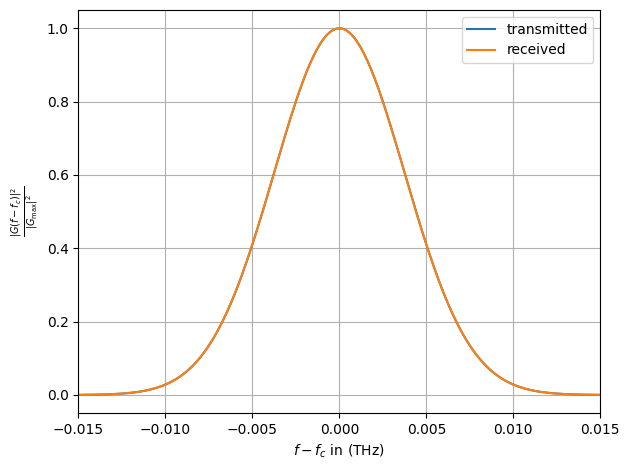

In [78]:
fig, (ax2) = plt.subplots(1, 1)

# ax1.plot(t.numpy().flatten(), np.abs(x.numpy().flatten())**2)
# ax1.plot(t.numpy().flatten(), np.abs(y.numpy().flatten())**2)
# ax1.set_xlim(-100, 100)
# ax1.set_xlabel(r"$t$ in (ps)")
# ax1.set_ylabel(r"$|g(t)|^2$ in (W)")
# ax1.grid()

ax2.plot(
    f.numpy().flatten(),
    (X.numpy().flatten())/np.max(X.numpy().flatten()))
ax2.plot(
    f.numpy().flatten(),
    (Y.numpy().flatten())/np.max(Y.numpy().flatten()))
ax2.set_xlim(-0.015, 0.015)
ax2.set_xlabel(r"$f-f_c$ in (THz)")
ax2.set_ylabel(r"$\frac{|G(f-f_c)|^2}{|G_\mathrm{max}|^2}$")
ax2.grid()

ax2.legend(['transmitted', 'received'])
plt.tight_layout()

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

tikzplotlib_fix_ncols(fig)

# Generate a unique file name based on link distance and linewidth
fig.savefig("cd_f.svg", format='svg')
tikzplotlib.save('cd_f.tex')
# Show plot
plt.show()

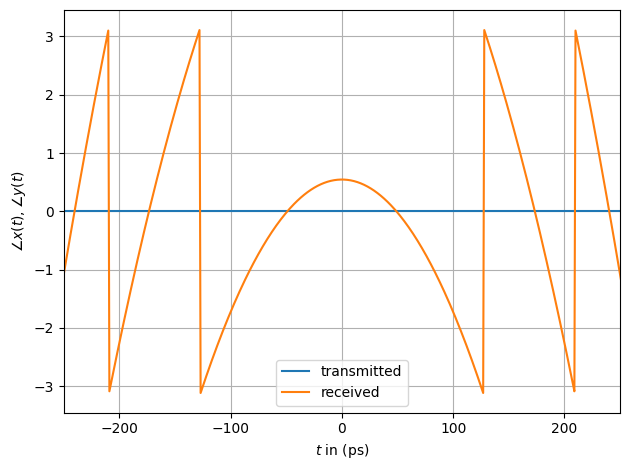

In [79]:
fig, (ax1) = plt.subplots(1, 1, tight_layout=True)

ax1.plot(t.numpy().flatten(), np.angle(x.numpy().flatten()))
ax1.plot(t.numpy().flatten(), np.angle(y.numpy().flatten()))
ax1.set_xlim(-250, 250)
ax1.set_xlabel(r"$t$ in (ps)")
ax1.set_ylabel("$\u2220 x(t), \u2220 y(t)$")
ax1.grid()

ax1.legend(['transmitted', 'received'])
plt.tight_layout()

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

tikzplotlib_fix_ncols(fig)

# Generate a unique file name based on link distance and linewidth
fig.savefig("cd_phase.svg", format='svg')
tikzplotlib.save('cd_phase.tex')
# Show plot
plt.show()